## Course Project

The World Bank Data contains three datasets related to country population, fertility rate and life expectancy up to 2016 

### Aims

. Make a prediction Model for predicting these three variables

### Objectives

. Model should be tested for 10 countries selected randomly\
. Predictions should be made for 2017 (and optionally for 2018)\
. Results should be compared with actual historical data from the World Bank Site.


##### 	Group 19: Daniela Moutinho Nº 57064  -  Diana Moreno Nº 51549  -  Paulo Martins Nº 37426

_______________________________________________________________________________

In [12]:
# import Pandas and alias it as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploratory Data Analysis

We need to understand the datasets and the variables in study.

There are three different data sets: "Country Population", " Life Expectancy" and "Fertility Rate"\
with data for 264 countries or world regions from 1960 to 2016.

Let's check each one of them.

### Country Population

In [13]:
# Reading a DataFrame from a file
country_population = pd.read_csv("country_population.csv")
country_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


We should visualize the data:

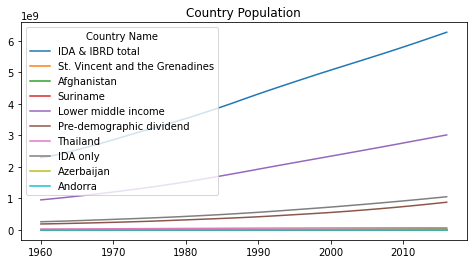

In [14]:
CP=pd.read_csv("country_population.csv", index_col='Country Name')
CP=CP.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
yCP =CP.iloc[:,0:]     # Select data for the last  years
tCP=yCP.transpose()    # Transpose data
CP10=tCP.sample(n = 10, axis='columns')     # Select randomly 10 countrys to plot data 
CP10.plot(figsize=(8, 4))        # Plot data
plt.title("Country Population")
plt.show()

It seems there is a tendency for population increase over time

### Life Expectancy

In [15]:
# Reading a DataFrame from a file
life_expectancy = pd.read_csv("life_expectancy.csv")
#life_expectancy.head()

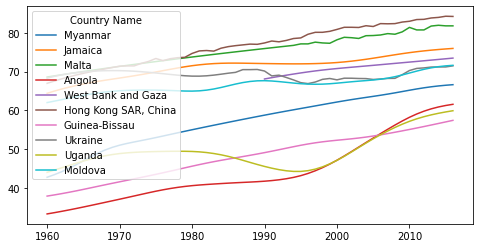

In [16]:
LE=pd.read_csv("life_expectancy.csv", index_col='Country Name')
LE=LE.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
yLE =LE.iloc[:,0:]      # Select data for the last years
tLE=yLE.transpose()     # Transpose data 
LE10=tLE.sample(n = 10, axis='columns')   # Select randomly 10 countrys to plot data 
LE10.plot(figsize=(8, 4))        # Plot data
plt.show()

We can observe that, globally, the life expectancy seems to been increasing all over the world in the last years.

### Fertility Rate

In [17]:
# Reading a DataFrame from a file
fertility_rate = pd.read_csv("fertility_rate.csv")
#fertility_rate.head()

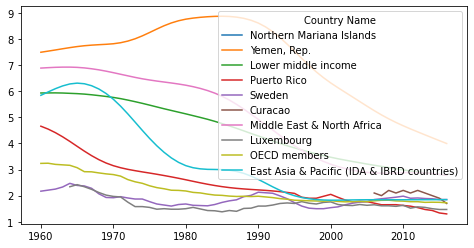

In [18]:
FR=pd.read_csv("fertility_rate.csv", index_col='Country Name')
FR=FR.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
yFR=FR.iloc[:,0:]    # Select data for the last years
tFR=yFR.transpose()   # Transpose data
FR10=tFR.sample(n = 10, axis='columns')   # Select randomly 10 countrys to plot data 
FR10.plot(figsize=(8, 4))    # Plot data
plt.show()

However, the fertility rate is mainly decreasing all over the world in the last years

Overall it is possible to observe a linear trend of the data, so we need to transform it in order to reduce that trend.

## Transforming Data

A stationary time series is easier to model than a non-stationary one 'cause its statistical properties will remain the same through time.\
Thus, it is necesssary to transform the data.\
The most basic transformation is to time-difference the data: calculating the difference between consecutive time steps. 

Since there are some missing values in the data, we should create several rows of data for the same country,\
in an attempt to have useful data for every country.

### Country Population

In [19]:
country_population_treated = country_population
country_population_treated = country_population_treated.drop("Country Code", axis=1)
country_population_treated = country_population_treated.drop("Indicator Name", axis=1) 
country_population_treated = country_population_treated.drop("Indicator Code", axis=1) 

life_expectancy_treated = life_expectancy
life_expectancy_treated = life_expectancy_treated.drop("Country Code", axis=1)
life_expectancy_treated = life_expectancy_treated.drop("Indicator Name", axis=1) 
life_expectancy_treated = life_expectancy_treated.drop("Indicator Code", axis=1) 

fertility_rate_treated = fertility_rate
fertility_rate_treated = fertility_rate_treated.drop("Country Code", axis=1)
fertility_rate_treated = fertility_rate_treated.drop("Indicator Name", axis=1) 
fertility_rate_treated = fertility_rate_treated.drop("Indicator Code", axis=1) 

### DeltasDataframe

In [20]:
def processYearsintoDeltas(listofDatasets, listofNames, numberOfDeltas, yearDifference):
  kSize = numberOfDeltas
  deltasDataframesTemp = []
  counter = 0
  for dataset in listofDatasets:
    dataframeAnterior = dataset
    columns=['Country ID']
    columns.extend([listofNames[counter]+'_delta_' + str(i+1) for i in range(kSize)])
    deltasDataframesTemp.append(pd.DataFrame(columns=columns))
    for i in range(len(dataframeAnterior)):
        for j in range(len(dataframeAnterior.iloc[i])):
          if (j!=0):
            newRow=[i]
            for k in range(kSize):
              if(j+k+yearDifference < len(dataframeAnterior.iloc[i])):
                anterior = dataframeAnterior.iat[i, j+k]
                posterior = dataframeAnterior.iat[i, j+k+yearDifference]
                delta = posterior - anterior
                newRow=newRow+[delta]
            if(j+k+yearDifference < len(dataframeAnterior.iloc[i])):
              deltasDataframesTemp[counter].loc[len(deltasDataframesTemp[counter])] = newRow;
    counter=counter+1
  return deltasDataframesTemp

In [21]:
datasetsList = [country_population_treated, life_expectancy_treated, fertility_rate_treated]
datasetsNames = ["CP", "LE", "FR"]
deltasDataframes = processYearsintoDeltas(datasetsList, datasetsNames, 4, 1)

Now we have several data rows for each country:

So, let's see what is happening to the transformed data.\
Choosing just one country.\
Let's says Aruba:

In [22]:
# Select one country data and transpose 
tfd=[]
for deltasDataframe in deltasDataframes:
  Aruba=deltasDataframe[deltasDataframe["Country ID"] ==0]
  tfd.append(Aruba.transpose())

Plot the data:

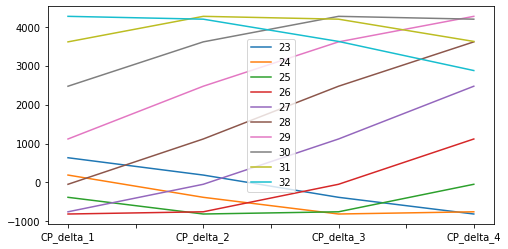

In [23]:
tfdTemp=tfd[0].iloc[:,23:33] 
tdfSemCountry = tfdTemp.drop(labels="Country ID", axis=0)
tdfSemCountry.plot(figsize=(8, 4))
plt.show()

We can see the different profiles of time-difference data for Aruba and the reduced linear trend.

We should now check for missing values and delete those rows, since hopefuly we will still have all countries (or most of them) represented.

In [24]:
def searchForMissingValues(listofDatasets, listofNames):
  print("As seguintes colunas contêm missing values:\n")
  j=0
  for dataFrame in listofDatasets:
    space = ' '   
    print(listofNames[j],":")
    j=j+1
    for i in dataFrame:
      soma = dataFrame[i].isna().sum()
      if soma > 0:
        print(i,"->",dataFrame[i].isna().sum())
    print()

datasetsList = deltasDataframes
datasetsNames = ["country_population", "life_expectancy", "fertility_rate"]
searchForMissingValues(datasetsList,datasetsNames)

As seguintes colunas contêm missing values:

country_population :
CP_delta_1 -> 157
CP_delta_2 -> 155
CP_delta_3 -> 153
CP_delta_4 -> 151

life_expectancy :
LE_delta_1 -> 1257
LE_delta_2 -> 1248
LE_delta_3 -> 1240
LE_delta_4 -> 1231

fertility_rate :
FR_delta_1 -> 1250
FR_delta_2 -> 1239
FR_delta_3 -> 1228
FR_delta_4 -> 1217



In [25]:
deltasDataframesSemNaN = []
for dataFrame in deltasDataframes:
  dataFrameSemNaN = dataFrame.dropna()
  deltasDataframesSemNaN.append(dataFrameSemNaN)

## Model Training 

### Defining the variables:


It is asked to produce a model to be TESTED for 10 randomly selected countries to make predictions for 2017

### Some Imports:

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

## X_train, X_test, y_train, y_test = train_test_split(dataSetX, dataSetY, test_size=0.25, random_state=0)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score, confusion_matrix,matthews_corrcoef, precision_score, recall_score
from multiprocessing import Process
from time import process_time
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

### Dividing train and test datasets

Choosing 10 different countries randomly

In [49]:
import random
countriesIDS = []
for i in range(10):
  numero = (int(random.random()*264))
  print(str(numero)+" :"+country_population["Country Name"][numero])
  countriesIDS.append(numero)
countriesIDS.sort()

261 :South Africa
8 :Armenia
19 :Bulgaria
259 :Kosovo
45 :Cabo Verde
87 :Greece
74 :Fiji
104 :Indonesia
198 :Qatar
56 :Denmark


In [50]:
dfTestList = []
dfTrainList = []
for dataFrame in deltasDataframesSemNaN:
  dfTeste = dataFrame.iloc[0:0]
  dfTrain = dataFrame
  for countryID in countriesIDS:
    dfTesteTemp = dataFrame.loc[dataFrame["Country ID"] == countryID]
    dfTeste = dfTeste.append(dfTesteTemp)
    dfTrain = dfTrain.loc[dfTrain["Country ID"] != countryID]
  dfTestList.append(dfTeste)
  dfTrainList.append(dfTrain)

Train with all the countries except the 10 randomly chosen ones 

Test with the 10 randomly chosen countries

In [51]:
dfTrainYList = []
dfTrainXList = []
for dfTrain in dfTrainList:
  dfTrainY = dfTrain.iloc[: , -1] # dfTrainY = Last Column 
  dfTrainYList.append(dfTrainY)
  dfTrainX = dfTrain.drop(dfTrain.columns[-1], axis=1) #  dfTrainX = dfTrain.drop(Last Column)
  dfTrainX = dfTrainX.drop(dfTrainX.columns[0], axis=1) #  dfTrainX = dfTrainX.drop(Country ID)
  dfTrainXList.append(dfTrainX)

dfTestYList = []
dfTestXList = []
for dfTest in dfTestList:
  dfTestY = dfTest.iloc[: , -1] # dfTesteY = Last Column 
  dfTestYList.append(dfTestY)
  dfTestX = dfTest.drop(dfTest.columns[-1], axis=1) #  dfTesteX = dfTrain.drop(Last Column)
  dfTestX = dfTestX.drop(dfTestX.columns[0], axis=1) #  dfTesteX = dfTrainX.drop(Country ID)
  dfTestXList.append(dfTestX)

### Naif Testing:

In [41]:
def naif_model_testing(X_train, X_test, y_train, y_test):   
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    lmr = LinearRegression()
    lmr.fit(X_train, y_train)
    knr = KNeighborsRegressor()
    knr.fit(X_train, y_train)
   
    rf_preds=rfr.predict(X_test)
    dt_preds=dtr.predict(X_test)
    lr_preds=lmr.predict(X_test)
    kn_preds=knr.predict(X_test)

    modelsPredsList = [rf_preds, dt_preds, lr_preds, kn_preds]
    modelsNames = ["RF", "DT", "LR","KNR"]

    for i in range(len(modelsPredsList)):
      preds = modelsPredsList[i]
      name = modelsNames[i]
      print("The RVE for",name,"is: ", explained_variance_score(y_test, preds))
      print("The rmse for",name,"is: ", mean_squared_error(y_test, preds, squared=False))
      corr, pval=pearsonr(y_test, preds)
      print("The Correlation Score for",name,"is: %6.4f (p-value=%e)"%(corr,pval))
      print("The Maximum Error for",name,"is: ", max_error(y_test, preds))
      print("The Mean Absolute Error for",name,"is: ", mean_absolute_error(y_test, preds))
      print("")

In [47]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfTrainXList[i], dfTestXList[i], dfTrainYList[i], dfTestYList[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("Naive test para o dataset",nomes[i])
  print()
  naif_model_testing(X_train, X_test, y_train, y_test)

-----------------------------
Naive test para o dataset Country Population

The RVE for RF is:  0.986755185425775
The rmse for RF is:  115525.87142478375
The Correlation Score for RF is: 0.9934 (p-value=0.000000e+00)
The Maximum Error for RF is:  1379456.73
The Mean Absolute Error for RF is:  36955.229408221014

The RVE for DT is:  0.9747763858469108
The rmse for DT is:  159381.51861043044
The Correlation Score for DT is: 0.9875 (p-value=0.000000e+00)
The Maximum Error for DT is:  1602280.0
The Mean Absolute Error for DT is:  51490.49056603773

The RVE for LR is:  0.9833511851352447
The rmse for LR is:  129779.23845510621
The Correlation Score for LR is: 0.9918 (p-value=0.000000e+00)
The Maximum Error for LR is:  1720699.1630986477
The Mean Absolute Error for LR is:  40045.0678629021

The RVE for KNR is:  0.986081217004732
The rmse for KNR is:  118364.14310856792
The Correlation Score for KNR is: 0.9931 (p-value=0.000000e+00)
The Maximum Error for KNR is:  1488063.0
The Mean Absolute E

### GridSearchCV Testing:

In [33]:
def gridSearchandTest(X_train, X_test, y_train, y_test):
  grid_searchList = []
  # Define the models to be evaluated
  models = [
      DecisionTreeRegressor(random_state=42),
      LinearRegression(),
      KNeighborsRegressor(),
      RandomForestRegressor(random_state=42),
  ]
  # Define the grid of hyperparameters to be searched
  param_grids = [
      {         
      'min_samples_leaf':[2,3,4,5], # default=2
      'criterion':["squared_error", "friedman_mse", "absolute_error"], # default=”squared_error”    
      'max_depth':[None, 1,2,3,4,5,10,15,20] # default=None
      },
      {
      },
      {      
        'n_neighbors':[1,5,10,15], # default=5      
        'weights':["uniform", "distance"] # default=’uniform’]
      },
      {
        'min_samples_leaf':[2,3,4,5], # default=2
        'n_estimators':[50,100,150,200] # default=100
      }
  ]
  # y_trainCasted=y_train.astype('int')
  # y_testCasted=y_test.astype('int')
  def f(model, param_grid, i):
      start_time = process_time()
      grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error')
      grid_search.fit(X_train, y_train)
      grid_searchList.append(grid_search)
      print("model #", i)
      print("model name", model)
      print(grid_search.best_params_)
      print("Score:", grid_search.best_score_)
      preds=grid_search.best_estimator_.predict(X_test)
      print("The RVE is: ", explained_variance_score(y_test, preds))
      print("The rmse is: ", mean_squared_error(y_test, preds, squared=False))
      corr, pval=pearsonr(y_test, preds)
      print("The Pearson Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))
      print("The Maximum Error is: ", max_error(y_test, preds))
      print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))
      end_time = process_time()
      print("Elapsed time in seconds:", end_time - start_time)      
      print("-----------------------------------------------")
      
  procs = []
  # Perform grid search cross-validation with 3-fold stratified cross-validation
  for model, param_grid, i in zip(models, param_grids, range(len(models))):
      p = Process(target=f, args=(model, param_grid, i))
      procs.append(p)
      p.start()
      p.join()

  # for proc in procs:
  #   proc.join()

  for grid_search in grid_searchList:
      res = pd.DataFrame(grid_search.cv_results_)
      res = res.sort_values(by=["rank_test_score"])
      res[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

In [34]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfTrainXList[i], dfTestXList[i], dfTrainYList[i], dfTestYList[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("GridSearchCV para o dataset",nomes[i])
  print()
  gridSearchandTest(X_train, X_test, y_train, y_test)

-----------------------------
GridSearchCV para o dataset Country Population

model # 0
model name DecisionTreeRegressor(random_state=42)
{'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2}
Score: -141434.54210842922
The RVE is:  0.9959251208881214
The rmse is:  369795.98166351917
The Pearson Correlation Score is: 0.9980 (p-value=0.000000e+00)
The Maximum Error is:  3395578.666666668
The Mean Absolute Error is:  132286.27405660378
Elapsed time in seconds: 186.395424099
-----------------------------------------------
model # 1
model name LinearRegression()
{}
Score: -79169.4790083251
The RVE is:  0.9962157980655058
The rmse is:  356411.4784878714
The Pearson Correlation Score is: 0.9981 (p-value=0.000000e+00)
The Maximum Error is:  3245127.1787709706
The Mean Absolute Error is:  128665.36874852015
Elapsed time in seconds: 0.20673012999999998
-----------------------------------------------
model # 2
model name KNeighborsRegressor()
{'n_neighbors': 5, 'weights': 'dist

## Prediction

In [35]:
country_population2017 = pd.read_csv("country_population_2017.csv")
life_expectancy_2017 = pd.read_csv("life_expectancy_2017.csv")
fertility_rate_2017 = pd.read_csv("fertility_rate_2017.csv")

In [52]:
for i in range(3):
  if (i==0): print("Predictions Para Country Population:\n")
  if (i==1): print("Predictions Para Life Expectancy:\n")
  if (i==2): print("Predictions Para Fertility Rate:\n")
  for numero in countriesIDS:
    nome = country_population["Country Name"][numero]
    X_train, X_test, y_train, y_test = dfTrainXList[i], dfTestXList[i], dfTrainYList[i], dfTestYList[i]
    if (i==0):         
      coluna = country_population2017[country_population2017["Country Name"]==nome]
      coluna2016 = country_population[country_population["Country Name"]==nome]
      modelFinal = KNeighborsRegressor(n_neighbors=5, weights='distance')
    if (i==1):     
      coluna = life_expectancy_2017[life_expectancy_2017["Country Name"]==nome]
      coluna2016 = life_expectancy[life_expectancy["Country Name"]==nome]
      modelFinal = KNeighborsRegressor(n_neighbors=10, weights='distance')
    if (i==2):       
      coluna = fertility_rate_2017[fertility_rate_2017["Country Name"]==nome]
      coluna2016 = fertility_rate[fertility_rate["Country Name"]==nome] 
      modelFinal = KNeighborsRegressor(n_neighbors=15, weights='uniform')
    delta2017 = (coluna["2017"].values[0]) - (coluna2016["2016"].values[0])
    delta_3 = (coluna2016["2016"].values[0]) - (coluna2016["2015"].values[0])
    delta_2 = (coluna2016["2015"].values[0]) - (coluna2016["2014"].values[0])
    delta_1 = (coluna2016["2014"].values[0]) - (coluna2016["2013"].values[0])
    modelFinal.fit(X_train, y_train)
    newDataFrame = dfTrainXList[i].iloc[0:0]
    newDataFrame = newDataFrame.iloc[0:0]
    newDataFrame.loc[i] = [delta_1, delta_2, delta_3];
    y_pred = modelFinal.predict(newDataFrame)
    print(nome) 
    print("-> Total 2017:", (coluna["2017"].values[0]))
    print("-> Deltas for Prediction:",delta_1, delta_2, delta_3)
    print("-> True Delta (2017-2016):",delta2017)
    print("-> Prediction:",y_pred[0])
    print()

Predictions Para Country Population:

Armenia
-> Total 2017: 2851923.0
-> Deltas for Prediction: 12711.0 10730.0 7866.0
-> True Delta (2017-2016): -72893.0
-> Prediction: 7235.274803589283

Bulgaria
-> Total 2017: 7075947.0
-> Deltas for Prediction: -41177.0 -45947.0 -50169.0
-> True Delta (2017-2016): -51875.0
-> Prediction: -56686.7859784781

Cabo Verde
-> Total 2017: 564954.0
-> Deltas for Prediction: 6331.0 6476.0 6647.0
-> True Delta (2017-2016): 25394.0
-> Prediction: 6734.48541830766

Denmark
-> Total 2017: 5764980.0
-> Deltas for Prediction: 28543.0 40008.0 44527.0
-> True Delta (2017-2016): 36970.0
-> Prediction: 46334.66545555611

Fiji
-> Total 2017: 919019.0
-> Deltas for Prediction: 6091.0 6343.0 6611.0
-> True Delta (2017-2016): 20259.0
-> Prediction: 6665.442133741282

Greece
-> Total 2017: 10754679.0
-> Deltas for Prediction: -72798.0 -71530.0 -50362.0
-> True Delta (2017-2016): -15842.0
-> Prediction: -32173.049289523624

Indonesia
-> Total 2017: 264498852.0
-> Deltas f

## Let's try and do some testing and predictions for a dataframe with more deltas

create dataset with 8 deltas

In [53]:
datasetsList = [country_population_treated, life_expectancy_treated, fertility_rate_treated]
datasetsNames = ["CP", "LE", "FR"]
deltasDataframesMaior = processYearsintoDeltas(datasetsList, datasetsNames, 8, 1)

drop NaN from new dataset

In [54]:
deltasDataframesMaiorSemNaN = []
for dataFrame in deltasDataframesMaior:
  dataFrameSemNaN = dataFrame.dropna()
  deltasDataframesMaiorSemNaN.append(dataFrameSemNaN)

divide training and testing set according to random countries

In [55]:
dfMaiorTestList = []
dfMaiorTrainList = []
for dataFrame in deltasDataframesMaiorSemNaN:
  dfTeste = dataFrame.iloc[0:0]
  dfTrain = dataFrame
  for countryID in countriesIDS:
    dfTesteTemp = dataFrame.loc[dataFrame["Country ID"] == countryID]
    dfTeste = dfTeste.append(dfTesteTemp)
    dfTrain = dfTrain.loc[dfTrain["Country ID"] != countryID]
  dfMaiorTestList.append(dfTeste)
  dfMaiorTrainList.append(dfTrain)

Remove unnecessary columns

In [56]:
dfMaiorTrainYList = []
dfMaiorTrainXList = []
for dfTrain in dfMaiorTrainList:
  dfTrainY = dfTrain.iloc[: , -1] # dfTrainY = Last Column 
  dfMaiorTrainYList.append(dfTrainY)
  dfTrainX = dfTrain.drop(dfTrain.columns[-1], axis=1) #  dfTrainX = dfTrain.drop(Last Column)
  dfTrainX = dfTrainX.drop(dfTrainX.columns[0], axis=1) #  dfTrainX = dfTrainX.drop(Country ID)
  dfMaiorTrainXList.append(dfTrainX)

dfMaiorTestYList = []
dfMaiorTestXList = []
for dfTest in dfMaiorTestList:
  dfTestY = dfTest.iloc[: , -1] # dfTesteY = Last Column 
  dfMaiorTestYList.append(dfTestY)
  dfTestX = dfTest.drop(dfTest.columns[-1], axis=1) #  dfTesteX = dfTrain.drop(Last Column)
  dfTestX = dfTestX.drop(dfTestX.columns[0], axis=1) #  dfTesteX = dfTrainX.drop(Country ID)
  dfMaiorTestXList.append(dfTestX)

Train and Naive test for Dataframe with 7+1 deltas

In [57]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfMaiorTrainXList[i], dfMaiorTestXList[i], dfMaiorTrainYList[i], dfMaiorTestYList[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("Naive test para o dataset",nomes[i])
  print()
  naif_model_testing(X_train, X_test, y_train, y_test)

-----------------------------
Naive test para o dataset Country Population

The RVE for RF is:  0.9989572463187628
The rmse for RF is:  30645.791250293263
The Correlation Score for RF is: 0.9995 (p-value=0.000000e+00)
The Maximum Error for RF is:  343860.65
The Mean Absolute Error for RF is:  12880.290930612244

The RVE for DT is:  0.9924742269810946
The rmse for DT is:  82287.2180434768
The Correlation Score for DT is: 0.9963 (p-value=0.000000e+00)
The Maximum Error for DT is:  1440113.0
The Mean Absolute Error for DT is:  25370.110204081633

The RVE for LR is:  0.9995303617882326
The rmse for LR is:  21218.48151167173
The Correlation Score for LR is: 0.9998 (p-value=0.000000e+00)
The Maximum Error for LR is:  186117.04496115033
The Mean Absolute Error for LR is:  11657.546615505831

The RVE for KNR is:  0.9979935062355089
The rmse for KNR is:  42641.608796798275
The Correlation Score for KNR is: 0.9990 (p-value=0.000000e+00)
The Maximum Error for KNR is:  279087.0
The Mean Absolute E

GridSearchCV and testing with 7+1 deltas

In [ ]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfMaiorTrainXList[i], dfMaiorTestXList[i], dfMaiorTrainYList[i], dfMaiorTestYList[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("GridSearchCV para o dataset",nomes[i])
  print()
  gridSearchandTest(X_train, X_test, y_train, y_test)

Predictions para 7+1 deltas 

In [58]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfMaiorTrainXList[i], dfMaiorTestXList[i], dfMaiorTrainYList[i], dfMaiorTestYList[i]   
  modelFinal = None
  if (i==0): 
    print("Predictions Para Country Population:\n")
    modelFinal = RandomForestRegressor(min_samples_leaf=3, n_estimators=50)
  if (i==1): 
    print("Predictions Para Life Expectancy:\n")
    modelFinal = KNeighborsRegressor(n_neighbors=5, weights='distance')
  if (i==2): 
    print("Predictions Para Fertility Rate:\n")
    modelFinal = RandomForestRegressor(min_samples_leaf=2, n_estimators=150)
  modelFinal.fit(X_train, y_train)
  for numero in countriesIDS:
    nome = country_population["Country Name"][numero]    
    coluna = None
    coluna2016 = None    
    if (i==0):         
      coluna = country_population2017[country_population2017["Country Name"]==nome]
      coluna2016 = country_population[country_population["Country Name"]==nome]      
    if (i==1):     
      coluna = life_expectancy_2017[life_expectancy_2017["Country Name"]==nome]
      coluna2016 = life_expectancy[life_expectancy["Country Name"]==nome]
    if (i==2):       
      coluna = fertility_rate_2017[fertility_rate_2017["Country Name"]==nome]
      coluna2016 = fertility_rate[fertility_rate["Country Name"]==nome]      
    delta2017 = (coluna["2017"].values[0]) - (coluna2016["2016"].values[0])
    delta_7 = (coluna2016["2016"].values[0]) - (coluna2016["2015"].values[0])
    delta_6 = (coluna2016["2015"].values[0]) - (coluna2016["2014"].values[0])
    delta_5 = (coluna2016["2014"].values[0]) - (coluna2016["2013"].values[0])
    delta_4 = (coluna2016["2013"].values[0]) - (coluna2016["2012"].values[0])
    delta_3 = (coluna2016["2012"].values[0]) - (coluna2016["2011"].values[0])
    delta_2 = (coluna2016["2011"].values[0]) - (coluna2016["2010"].values[0])
    delta_1 = (coluna2016["2010"].values[0]) - (coluna2016["2009"].values[0])    
    newDataFrame = dfMaiorTrainXList[i].iloc[0:0]
    newDataFrame = newDataFrame.iloc[0:0]
    newDataFrame.loc[i] = [delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7];
    y_pred = modelFinal.predict(newDataFrame)
    print(nome) 
    print("-> Total 2017:", (coluna["2017"].values[0]))
    print("-> Deltas for Prediction:",delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7)
    print("-> True Delta (2017-2016):",delta2017)
    print("-> Prediction:",y_pred[0])
    print()

Predictions Para Country Population:

Armenia
-> Total 2017: 2851923.0
-> Deltas for Prediction: -11273.0 -1730.0 6341.0 11587.0 12711.0 10730.0 7866.0
-> True Delta (2017-2016): -72893.0
-> Prediction: 4319.256341991342

Bulgaria
-> Total 2017: 7075947.0
-> Deltas for Prediction: -48844.0 -47271.0 -42440.0 -40773.0 -41177.0 -45947.0 -50169.0
-> True Delta (2017-2016): -51875.0
-> Prediction: -50870.48155006105

Cabo Verde
-> Total 2017: 564954.0
-> Deltas for Prediction: 5421.0 5683.0 5912.0 6127.0 6331.0 6476.0 6647.0
-> True Delta (2017-2016): 25394.0
-> Prediction: 6729.1386789321805

Denmark
-> Total 2017: 5764980.0
-> Deltas for Prediction: 24588.0 22889.0 21000.0 23360.0 28543.0 40008.0 44527.0
-> True Delta (2017-2016): 36970.0
-> Prediction: 51350.24679437227

Fiji
-> Total 2017: 919019.0
-> Deltas for Prediction: 7983.0 7136.0 6510.0 6119.0 6091.0 6343.0 6611.0
-> True Delta (2017-2016): 20259.0
-> Prediction: 6567.74707936508

Greece
-> Total 2017: 10754679.0
-> Deltas for P

## Creating deltas datasets, training, testing and making Predictions to 2018

In [59]:
datasetsList = [country_population_treated, life_expectancy_treated, fertility_rate_treated]
datasetsNames = ["CP", "LE", "FR"]
deltasDataframes2years = processYearsintoDeltas(datasetsList, datasetsNames, 4, 2)
deltasDataframes2yearsGrande = processYearsintoDeltas(datasetsList, datasetsNames, 8, 2)

In [60]:
deltasDataframesSemNaN2years = []
for dataFrame in deltasDataframes2years:
  dataFrameSemNaN = dataFrame.dropna()
  deltasDataframesSemNaN2years.append(dataFrameSemNaN)

deltasDataframesMaiorSemNaN2years = []
for dataFrame in deltasDataframes2yearsGrande:
  dataFrameSemNaN = dataFrame.dropna()
  deltasDataframesMaiorSemNaN2years.append(dataFrameSemNaN)  

In [61]:
dfTestList2years = []
dfTrainList2years = []
for dataFrame in deltasDataframesSemNaN2years:
  dfTeste = dataFrame.iloc[0:0]
  dfTrain = dataFrame
  for countryID in countriesIDS:
    dfTesteTemp = dataFrame.loc[dataFrame["Country ID"] == countryID]
    dfTeste = dfTeste.append(dfTesteTemp)
    dfTrain = dfTrain.loc[dfTrain["Country ID"] != countryID]
  dfTestList2years.append(dfTeste)
  dfTrainList2years.append(dfTrain)

dfMaiorTestList2years = []
dfMaiorTrainList2years = []
for dataFrame in deltasDataframesMaiorSemNaN2years:
  dfTeste = dataFrame.iloc[0:0]
  dfTrain = dataFrame
  for countryID in countriesIDS:
    dfTesteTemp = dataFrame.loc[dataFrame["Country ID"] == countryID]
    dfTeste = dfTeste.append(dfTesteTemp)
    dfTrain = dfTrain.loc[dfTrain["Country ID"] != countryID]
  dfMaiorTestList2years.append(dfTeste)
  dfMaiorTrainList2years.append(dfTrain)

In [62]:
dfTrainYList2years = []
dfTrainXList2years = []
for dfTrain in dfTrainList2years:
  dfTrainY = dfTrain.iloc[: , -1] # dfTrainY = Last Column 
  dfTrainYList2years.append(dfTrainY)
  dfTrainX = dfTrain.drop(dfTrain.columns[-1], axis=1) #  dfTrainX = dfTrain.drop(Last Column)
  dfTrainX = dfTrainX.drop(dfTrainX.columns[0], axis=1) #  dfTrainX = dfTrainX.drop(Country ID)
  dfTrainXList2years.append(dfTrainX)

dfTestYList2years = []
dfTestXList2years = []
for dfTest in dfTestList2years:
  dfTestY = dfTest.iloc[: , -1] # dfTesteY = Last Column 
  dfTestYList2years.append(dfTestY)
  dfTestX = dfTest.drop(dfTest.columns[-1], axis=1) #  dfTesteX = dfTrain.drop(Last Column)
  dfTestX = dfTestX.drop(dfTestX.columns[0], axis=1) #  dfTesteX = dfTrainX.drop(Country ID)
  dfTestXList2years.append(dfTestX)

In [63]:
dfMaiorTrainYList2years = []
dfMaiorTrainXList2years = []
for dfTrain in dfMaiorTrainList2years:
  dfTrainY = dfTrain.iloc[: , -1] # dfTrainY = Last Column 
  dfMaiorTrainYList2years.append(dfTrainY)
  dfTrainX = dfTrain.drop(dfTrain.columns[-1], axis=1) #  dfTrainX = dfTrain.drop(Last Column)
  dfTrainX = dfTrainX.drop(dfTrainX.columns[0], axis=1) #  dfTrainX = dfTrainX.drop(Country ID)
  dfMaiorTrainXList2years.append(dfTrainX)

dfMaiorTestYList2years = []
dfMaiorTestXList2years = []
for dfTest in dfMaiorTestList2years:
  dfTestY = dfTest.iloc[: , -1] # dfTesteY = Last Column 
  dfMaiorTestYList2years.append(dfTestY)
  dfTestX = dfTest.drop(dfTest.columns[-1], axis=1) #  dfTesteX = dfTrain.drop(Last Column)
  dfTestX = dfTestX.drop(dfTestX.columns[0], axis=1) #  dfTesteX = dfTrainX.drop(Country ID)
  dfMaiorTestXList2years.append(dfTestX)

Naive testing for Deltas of 2 years difference.
First the one with 4 deltas:

In [64]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfTrainXList2years[i], dfTestXList2years[i], dfTrainYList2years[i], dfTestYList2years[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("Naive test para o dataset",nomes[i])
  print()
  naif_model_testing(X_train, X_test, y_train, y_test)

-----------------------------
Naive test para o dataset Country Population

The RVE for RF is:  0.9995232041039904
The rmse for RF is:  41075.63586068611
The Correlation Score for RF is: 0.9998 (p-value=0.000000e+00)
The Maximum Error for RF is:  359865.43000000005
The Mean Absolute Error for RF is:  18951.32620659341

The RVE for DT is:  0.9988566960427064
The rmse for DT is:  63951.58256693406
The Correlation Score for DT is: 0.9994 (p-value=0.000000e+00)
The Maximum Error for DT is:  551145.0
The Mean Absolute Error for DT is:  28364.823076923076

The RVE for LR is:  0.9997938578014246
The rmse for LR is:  27939.917682033018
The Correlation Score for LR is: 0.9999 (p-value=0.000000e+00)
The Maximum Error for LR is:  200156.16994933027
The Mean Absolute Error for LR is:  16419.324183783217

The RVE for KNR is:  0.9995546893470736
The rmse for KNR is:  39795.532346351894
The Correlation Score for KNR is: 0.9998 (p-value=0.000000e+00)
The Maximum Error for KNR is:  222098.40000000037
T

In [65]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfMaiorTrainXList2years[i], dfMaiorTestXList2years[i], dfMaiorTrainYList2years[i], dfMaiorTestYList2years[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("Naive test para o dataset",nomes[i])
  print()
  naif_model_testing(X_train, X_test, y_train, y_test)

-----------------------------
Naive test para o dataset Country Population

The RVE for RF is:  0.9993919762956618
The rmse for RF is:  46845.627097290424
The Correlation Score for RF is: 0.9997 (p-value=0.000000e+00)
The Maximum Error for RF is:  429065.43000000005
The Mean Absolute Error for RF is:  20920.582125000004

The RVE for DT is:  0.9978913125323513
The rmse for DT is:  87274.770529716
The Correlation Score for DT is: 0.9989 (p-value=0.000000e+00)
The Maximum Error for DT is:  1464583.0
The Mean Absolute Error for DT is:  30828.422916666666

The RVE for LR is:  0.9998556527249352
The rmse for LR is:  23561.836977605737
The Correlation Score for LR is: 0.9999 (p-value=0.000000e+00)
The Maximum Error for LR is:  207587.15060608945
The Mean Absolute Error for LR is:  13064.730033368187

The RVE for KNR is:  0.9981124049469717
The rmse for KNR is:  82802.43833948823
The Correlation Score for KNR is: 0.9991 (p-value=0.000000e+00)
The Maximum Error for KNR is:  717116.5999999996
Th

SearchGridCV for the new Dataframes.
First for the one with 4 deltas:

In [66]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfTrainXList2years[i], dfTestXList2years[i], dfTrainYList2years[i], dfTestYList2years[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("GridSearchCV para o dataset",nomes[i])
  print()
  gridSearchandTest(X_train, X_test, y_train, y_test)

-----------------------------
GridSearchCV para o dataset Country Population

model # 0
model name DecisionTreeRegressor(random_state=42)
{'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 2}
Score: -261199.14300748907
The RVE is:  0.999137650541704
The rmse is:  55488.88334339695
The Pearson Correlation Score is: 0.9996 (p-value=0.000000e+00)
The Maximum Error is:  337931.0
The Mean Absolute Error is:  26622.201923076922
Elapsed time in seconds: 179.99029111599998
-----------------------------------------------
model # 1
model name LinearRegression()
{}
Score: -98910.611968634
The RVE is:  0.9997938578014246
The rmse is:  27939.917682033018
The Pearson Correlation Score is: 0.9999 (p-value=0.000000e+00)
The Maximum Error is:  200156.16994933027
The Mean Absolute Error is:  16419.324183783217
Elapsed time in seconds: 0.188793559
-----------------------------------------------
model # 2
model name KNeighborsRegressor()
{'n_neighbors': 5, 'weights': 'distance'}
Score: -

In [67]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfMaiorTrainXList2years[i], dfMaiorTestXList2years[i], dfMaiorTrainYList2years[i], dfMaiorTestYList2years[i]
  nomes = ["Country Population", "Life Expectancy", "Fertility Rate"]
  print("-----------------------------")
  print("GridSearchCV para o dataset",nomes[i])
  print()
  gridSearchandTest(X_train, X_test, y_train, y_test)

-----------------------------
GridSearchCV para o dataset Country Population

model # 0
model name DecisionTreeRegressor(random_state=42)
{'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 5}
Score: -310395.65096102346
The RVE is:  0.9989178087538078
The rmse is:  63187.41917475461
The Pearson Correlation Score is: 0.9995 (p-value=0.000000e+00)
The Maximum Error is:  536743.5
The Mean Absolute Error is:  28698.042708333334
Elapsed time in seconds: 343.733839172
-----------------------------------------------
model # 1
model name LinearRegression()
{}
Score: -79798.69615365913
The RVE is:  0.9998556527249352
The rmse is:  23561.836977605737
The Pearson Correlation Score is: 0.9999 (p-value=0.000000e+00)
The Maximum Error is:  207587.15060608945
The Mean Absolute Error is:  13064.730033368187Elapsed time in seconds:
 0.285177784
-----------------------------------------------
model # 2
model name KNeighborsRegressor()
{'n_neighbors': 5, 'weights': 'distance'}
Score: -

Podemos usar estes dados para prever 2017:

In [68]:
for i in range(3):
  if (i==0): print("Predictions Para Country Population:\n")
  if (i==1): print("Predictions Para Life Expectancy:\n")
  if (i==2): print("Predictions Para Fertility Rate:\n")
  for numero in countriesIDS:
    nome = country_population["Country Name"][numero]
    X_train, X_test, y_train, y_test = dfTrainXList2years[i], dfTestXList2years[i], dfTrainYList2years[i], dfTestYList2years[i]
    if (i==0):         
      coluna = country_population2017[country_population2017["Country Name"]==nome]
      coluna2016 = country_population[country_population["Country Name"]==nome]
      modelFinal = KNeighborsRegressor(n_neighbors=5, weights='distance')
    if (i==1):     
      coluna = life_expectancy_2017[life_expectancy_2017["Country Name"]==nome]
      coluna2016 = life_expectancy[life_expectancy["Country Name"]==nome]
      modelFinal = KNeighborsRegressor(n_neighbors=10, weights='distance')
    if (i==2):       
      coluna = fertility_rate_2017[fertility_rate_2017["Country Name"]==nome]
      coluna2016 = fertility_rate[fertility_rate["Country Name"]==nome] 
      modelFinal = RandomForestRegressor(min_samples_leaf=3, n_estimators= 200)
    delta2017 = (coluna["2017"].values[0]) - (coluna2016["2015"].values[0])
    delta_3 = (coluna2016["2016"].values[0]) - (coluna2016["2014"].values[0])
    delta_2 = (coluna2016["2015"].values[0]) - (coluna2016["2013"].values[0])
    delta_1 = (coluna2016["2014"].values[0]) - (coluna2016["2012"].values[0])
    modelFinal.fit(X_train, y_train)
    newDataFrame = dfTrainXList[i].iloc[0:0]
    newDataFrame = newDataFrame.iloc[0:0]
    newDataFrame.loc[i] = [delta_1, delta_2, delta_3];
    y_pred = modelFinal.predict(newDataFrame)
    print(nome) 
    print("-> Total 2017:", (coluna["2017"].values[0]))
    print("-> Deltas for Prediction:",delta_1, delta_2, delta_3)
    print("-> True Delta (2017-2015):",delta2017)
    print("-> Prediction:",y_pred[0])
    print()

Predictions Para Country Population:

Armenia
-> Total 2017: 2851923.0
-> Deltas for Prediction: 24298.0 23441.0 18596.0
-> True Delta (2017-2015): -65027.0
-> Prediction: 17292.74288218718

Bulgaria
-> Total 2017: 7075947.0
-> Deltas for Prediction: -81950.0 -87124.0 -96116.0
-> True Delta (2017-2015): -102044.0
-> Prediction: -102711.6312723147

Cabo Verde
-> Total 2017: 564954.0
-> Deltas for Prediction: 12458.0 12807.0 13123.0
-> True Delta (2017-2015): 32041.0
-> Prediction: 13336.294911887559

Denmark
-> Total 2017: 5764980.0
-> Deltas for Prediction: 51903.0 68551.0 84535.0
-> True Delta (2017-2015): 81497.0
-> Prediction: 101265.59658634722

Fiji
-> Total 2017: 919019.0
-> Deltas for Prediction: 12210.0 12434.0 12954.0
-> True Delta (2017-2015): 26870.0
-> Prediction: 13076.266696563514

Greece
-> Total 2017: 10754679.0
-> Deltas for Prediction: -152598.0 -144328.0 -121892.0
-> True Delta (2017-2015): -66204.0
-> Prediction: -99550.11533650772

Indonesia
-> Total 2017: 26449885

In [69]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfMaiorTrainXList2years[i], dfMaiorTestXList2years[i], dfMaiorTrainYList2years[i], dfMaiorTestYList2years[i]
  modelFinal = None
  if (i==0): 
    print("Predictions Para Country Population:\n")
    modelFinal = RandomForestRegressor(min_samples_leaf=3, n_estimators=50)
  if (i==1): 
    print("Predictions Para Life Expectancy:\n")
    modelFinal = KNeighborsRegressor(n_neighbors=5, weights='distance')
  if (i==2): 
    print("Predictions Para Fertility Rate:\n")
    modelFinal = RandomForestRegressor(min_samples_leaf=2, n_estimators=150)
  modelFinal.fit(X_train, y_train)
  for numero in countriesIDS:
    nome = country_population["Country Name"][numero]    
    coluna = None
    coluna2016 = None    
    if (i==0):         
      coluna = country_population2017[country_population2017["Country Name"]==nome]
      coluna2016 = country_population[country_population["Country Name"]==nome]      
    if (i==1):     
      coluna = life_expectancy_2017[life_expectancy_2017["Country Name"]==nome]
      coluna2016 = life_expectancy[life_expectancy["Country Name"]==nome]
    if (i==2):       
      coluna = fertility_rate_2017[fertility_rate_2017["Country Name"]==nome]
      coluna2016 = fertility_rate[fertility_rate["Country Name"]==nome]      
    delta2017 = (coluna["2017"].values[0]) - (coluna2016["2015"].values[0])
    delta_7 = (coluna2016["2016"].values[0]) - (coluna2016["2014"].values[0])
    delta_6 = (coluna2016["2015"].values[0]) - (coluna2016["2013"].values[0])
    delta_5 = (coluna2016["2014"].values[0]) - (coluna2016["2012"].values[0])
    delta_4 = (coluna2016["2013"].values[0]) - (coluna2016["2011"].values[0])
    delta_3 = (coluna2016["2012"].values[0]) - (coluna2016["2010"].values[0])
    delta_2 = (coluna2016["2011"].values[0]) - (coluna2016["2009"].values[0])
    delta_1 = (coluna2016["2010"].values[0]) - (coluna2016["2008"].values[0])    
    newDataFrame = dfMaiorTrainXList[i].iloc[0:0]
    newDataFrame = newDataFrame.iloc[0:0]
    newDataFrame.loc[i] = [delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7];
    y_pred = modelFinal.predict(newDataFrame)
    print(nome) 
    print("-> Total 2017:", (coluna["2017"].values[0]))
    print("-> Deltas for Prediction:",delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7)
    print("-> True Delta (2017-2016):",delta2017)
    print("-> Prediction:",y_pred[0])
    print()

Predictions Para Country Population:

Armenia
-> Total 2017: 2851923.0
-> Deltas for Prediction: -30909.0 -13003.0 4611.0 17928.0 24298.0 23441.0 18596.0
-> True Delta (2017-2016): -65027.0
-> Prediction: 12723.325595238097

Bulgaria
-> Total 2017: 7075947.0
-> Deltas for Prediction: -96962.0 -96115.0 -89711.0 -83213.0 -81950.0 -87124.0 -96116.0
-> True Delta (2017-2016): -102044.0
-> Prediction: -85745.56126911977

Cabo Verde
-> Total 2017: 564954.0
-> Deltas for Prediction: 10661.0 11104.0 11595.0 12039.0 12458.0 12807.0 13123.0
-> True Delta (2017-2016): 32041.0
-> Prediction: 13280.653976190475

Denmark
-> Total 2017: 5764980.0
-> Deltas for Prediction: 54062.0 47477.0 43889.0 44360.0 51903.0 68551.0 84535.0
-> True Delta (2017-2016): 81497.0
-> Prediction: 98516.4574963925

Fiji
-> Total 2017: 919019.0
-> Deltas for Prediction: 16610.0 15119.0 13646.0 12629.0 12210.0 12434.0 12954.0
-> True Delta (2017-2016): 26870.0
-> Prediction: 12039.165500000001

Greece
-> Total 2017: 1075467

E fazer predictions para 2018:

In [71]:
for i in range(3):
  if (i==0): print("Predictions Para Country Population:\n")
  if (i==1): print("Predictions Para Life Expectancy:\n")
  if (i==2): print("Predictions Para Fertility Rate:\n")
  for numero in countriesIDS:
    nome = country_population["Country Name"][numero]
    X_train, X_test, y_train, y_test = dfTrainXList2years[i], dfTestXList2years[i], dfTrainYList2years[i], dfTestYList2years[i]
    if (i==0):         
      coluna = country_population2017[country_population2017["Country Name"]==nome]
      coluna2016 = country_population[country_population["Country Name"]==nome]
      modelFinal = KNeighborsRegressor(n_neighbors=5, weights='distance')
    if (i==1):     
      coluna = life_expectancy_2017[life_expectancy_2017["Country Name"]==nome]
      coluna2016 = life_expectancy[life_expectancy["Country Name"]==nome]
      modelFinal = KNeighborsRegressor(n_neighbors=10, weights='distance')
    if (i==2):       
      coluna = fertility_rate_2017[fertility_rate_2017["Country Name"]==nome]
      coluna2016 = fertility_rate[fertility_rate["Country Name"]==nome] 
      modelFinal = RandomForestRegressor(min_samples_leaf=3, n_estimators= 200)
    delta2017 = (coluna["2018"].values[0]) - (coluna2016["2016"].values[0])
    delta_3 = (coluna2016["2016"].values[0]) - (coluna2016["2014"].values[0])
    delta_2 = (coluna2016["2015"].values[0]) - (coluna2016["2013"].values[0])
    delta_1 = (coluna2016["2014"].values[0]) - (coluna2016["2012"].values[0])
    modelFinal.fit(X_train, y_train)
    newDataFrame = dfTrainXList[i].iloc[0:0]
    newDataFrame = newDataFrame.iloc[0:0]
    newDataFrame.loc[i] = [delta_1, delta_2, delta_3];
    y_pred = modelFinal.predict(newDataFrame)
    print(nome) 
    print("-> Total 2018:", (coluna["2018"].values[0]))
    print("-> Deltas for Prediction:",delta_1, delta_2, delta_3)
    print("-> True Delta (2018-2016):",delta2017)
    print("-> Prediction:",y_pred[0])
    print()

Predictions Para Country Population:

Armenia
-> Total 2018: 2836557.0
-> Deltas for Prediction: 24298.0 23441.0 18596.0
-> True Delta (2018-2016): -88259.0
-> Prediction: 17292.74288218718

Bulgaria
-> Total 2018: 7025037.0
-> Deltas for Prediction: -81950.0 -87124.0 -96116.0
-> True Delta (2018-2016): -102785.0
-> Prediction: -102711.6312723147

Cabo Verde
-> Total 2018: 571202.0
-> Deltas for Prediction: 12458.0 12807.0 13123.0
-> True Delta (2018-2016): 31642.0
-> Prediction: 13336.294911887559

Denmark
-> Total 2018: 5793636.0
-> Deltas for Prediction: 51903.0 68551.0 84535.0
-> True Delta (2018-2016): 65626.0
-> Prediction: 101265.59658634722

Fiji
-> Total 2018: 918996.0
-> Deltas for Prediction: 12210.0 12434.0 12954.0
-> True Delta (2018-2016): 20236.0
-> Prediction: 13076.266696563514

Greece
-> Total 2018: 10732882.0
-> Deltas for Prediction: -152598.0 -144328.0 -121892.0
-> True Delta (2018-2016): -37639.0
-> Prediction: -99550.11533650772

Indonesia
-> Total 2018: 26706684

In [72]:
for i in range(3):
  X_train, X_test, y_train, y_test = dfMaiorTrainXList2years[i], dfMaiorTestXList2years[i], dfMaiorTrainYList2years[i], dfMaiorTestYList2years[i]
  modelFinal = None
  if (i==0): 
    print("Predictions Para Country Population:\n")
    modelFinal = RandomForestRegressor(min_samples_leaf=3, n_estimators=50)
  if (i==1): 
    print("Predictions Para Life Expectancy:\n")
    modelFinal = KNeighborsRegressor(n_neighbors=5, weights='distance')
  if (i==2): 
    print("Predictions Para Fertility Rate:\n")
    modelFinal = RandomForestRegressor(min_samples_leaf=2, n_estimators=150)
  modelFinal.fit(X_train, y_train)
  for numero in countriesIDS:
    nome = country_population["Country Name"][numero]    
    coluna = None
    coluna2016 = None    
    if (i==0):         
      coluna = country_population2017[country_population2017["Country Name"]==nome]
      coluna2016 = country_population[country_population["Country Name"]==nome]      
    if (i==1):     
      coluna = life_expectancy_2017[life_expectancy_2017["Country Name"]==nome]
      coluna2016 = life_expectancy[life_expectancy["Country Name"]==nome]
    if (i==2):       
      coluna = fertility_rate_2017[fertility_rate_2017["Country Name"]==nome]
      coluna2016 = fertility_rate[fertility_rate["Country Name"]==nome]      
    delta2017 = (coluna["2018"].values[0]) - (coluna2016["2016"].values[0])
    delta_7 = (coluna2016["2016"].values[0]) - (coluna2016["2014"].values[0])
    delta_6 = (coluna2016["2015"].values[0]) - (coluna2016["2013"].values[0])
    delta_5 = (coluna2016["2014"].values[0]) - (coluna2016["2012"].values[0])
    delta_4 = (coluna2016["2013"].values[0]) - (coluna2016["2011"].values[0])
    delta_3 = (coluna2016["2012"].values[0]) - (coluna2016["2010"].values[0])
    delta_2 = (coluna2016["2011"].values[0]) - (coluna2016["2009"].values[0])
    delta_1 = (coluna2016["2010"].values[0]) - (coluna2016["2008"].values[0])    
    newDataFrame = dfMaiorTrainXList[i].iloc[0:0]
    newDataFrame = newDataFrame.iloc[0:0]
    newDataFrame.loc[i] = [delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7];
    y_pred = modelFinal.predict(newDataFrame)
    print(nome) 
    print("-> Total 2017:", (coluna["2018"].values[0]))
    print("-> Deltas for Prediction:",delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7)
    print("-> True Delta (2017-2016):",delta2017)
    print("-> Prediction:",y_pred[0])
    print()

Predictions Para Country Population:

Armenia
-> Total 2017: 2836557.0
-> Deltas for Prediction: -30909.0 -13003.0 4611.0 17928.0 24298.0 23441.0 18596.0
-> True Delta (2017-2016): -88259.0
-> Prediction: 10962.033579365077

Bulgaria
-> Total 2017: 7025037.0
-> Deltas for Prediction: -96962.0 -96115.0 -89711.0 -83213.0 -81950.0 -87124.0 -96116.0
-> True Delta (2017-2016): -102785.0
-> Prediction: -95031.27576984126

Cabo Verde
-> Total 2017: 571202.0
-> Deltas for Prediction: 10661.0 11104.0 11595.0 12039.0 12458.0 12807.0 13123.0
-> True Delta (2017-2016): 31642.0
-> Prediction: 13258.113619047619

Denmark
-> Total 2017: 5793636.0
-> Deltas for Prediction: 54062.0 47477.0 43889.0 44360.0 51903.0 68551.0 84535.0
-> True Delta (2017-2016): 65626.0
-> Prediction: 96925.21454256853

Fiji
-> Total 2017: 918996.0
-> Deltas for Prediction: 16610.0 15119.0 13646.0 12629.0 12210.0 12434.0 12954.0
-> True Delta (2017-2016): 20236.0
-> Prediction: 11846.867894660896

Greece
-> Total 2017: 107328